In [157]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [158]:
# Load apple dataset
df = pd.read_csv('aapl_data.csv')
df.head()

,date,open,high,low,close,volume,adjusted_close,change_percent,avg_vol_20d
0,1980-12-12,28.7392,28.8736,28.7392,28.7392,2093900,0.0993,NaN,NaN
1,1980-12-15,27.3728,27.3728,27.2608,27.2608,785200,0.0942,-5.14,NaN
2,1980-12-16,25.3792,25.3792,25.2448,25.2448,472000,0.0872,-7.43,NaN
3,1980-12-17,25.8720,26.0064,25.8720,25.8720,385900,0.0894,2.52,NaN
4,1980-12-18,26.6336,26.7456,26.6336,26.6336,327900,0.0920,2.91,NaN


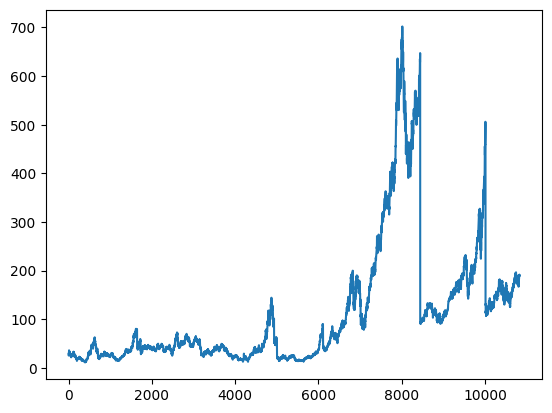

In [159]:
# Plot close data
plt.plot(df['close'])
plt.show()

In [160]:
# Define features and target variables and split data into training and test sets
train_set = df.iloc[:int(0.99 * len(df)), :]
test_set = df.iloc[int(0.99 * len(df)):, :]

X_train = train_set[['open', 'volume']]
y_train = train_set['close']
X_test = test_set[['open', 'volume']]
y_test = test_set['close']

In [161]:
# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

R2: 0.942974797819194


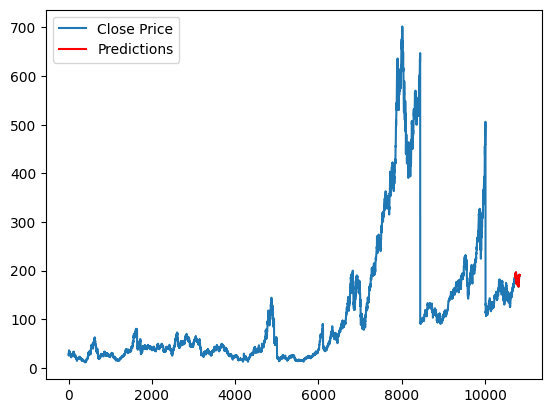

In [162]:
# Make predictions and check r2 value
y_pred = model.predict(X_test)

r2_score = r2_score(y_test, y_pred)
print(f'R2: {r2_score}')

plt.plot(df['close'], label='Close Price')
plt.plot(y_test.index, y_pred, color='red', label='Predictions')
plt.legend()
plt.show()